# 小象学院数据分析集训营

## 1. 项目描述：
精灵宝可梦系列是一套由日本GAME FREAK代表田尻智一同于1995年开发，日本任天堂株式会社于1996年推出的一款Game Boy（任天堂所推出之掌上型游戏机）游戏，其后发展为跨媒体制作的作品。

由于其独特的游戏系统广受大众的欢迎，年度产品销量近千万（红、绿二版本合计。全系列作目前累积已破亿）。任天堂趁此热潮，推出后续的一系列游戏、漫画、书籍、对战卡片及周边产品，还联合日本东京电视台推出电视动画，以及一年一度的剧场版动画电影，更在1998年成功进军美国，并拓展至世界各地（除了少数地方因为宗教等因素）。这套作品已成功打入全世界数十个国家，成为世界闻名的卡通形象和日本的国民动画。相关产品销售额达数十亿美元以上。因为各部分的成长，目前精灵宝可梦相关事业已经独立成一公司：精灵宝可梦股份有限公司（株式会社ポケモン），为任天堂旗下的子公司之一。

精灵宝可梦作品包括游戏、动画、漫画、卡片游戏及相关产品。宝可梦同时也是宝可梦世界所有虚构出来的物种所拥有的共同的名字。截至2017年10月，全系列的宝可梦共有805种。

基于此，我们可以对Pokémon的数据/变量进行统计分析，并从中发掘他们之间的关系，用可视化的方式进行直观的查看。

## 2. 数据集描述:
* Kaggle[提供的数据集](https://www.kaggle.com/alopez247/pokemon)。数据集形式为CSV文件。当前数据集只包含前6代的Pokémon。
* 数据字典
    * **Number**: Pokédex中的Pokémon ID，整型
    * **Name**: Pokémon名称，字符串
    * **Type_1**: 主要类别，字符串
    * **Type_2**: 副类别，字符串
    * **Total**: 基本统计值的和，整型。基本统计值包含以下6个属性：
    * **1. HP **: 生命值，整型
    * **2. Attack**: 攻击值，整型
    * **3. Defense**: 防御值，整型
    * **4. Sp_Atk**: 特殊攻击值，整型
    * **5. Sp_Def**: 特殊防御值，整型
    * **6. Speed**: 速度值，整型
    * **Generation**: 属于第几代Pokémon，整型
    * **isLegendary**: 是否为传说中的Pokémon，布尔值
    * **Color**: Pokémon颜色，字符串
    * **hasGender**: 是否有性别，布尔值
    * **Pr_male**: 可能为男性的概率，浮点型
    * **Egg_Group_1**: 蛋群分组1，字符串
    * **Egg_Group_2**: 蛋群分组2（如果有的话），字符串
    * **hasMegaEvolution**: 是否拥有Mega进化的能力，布尔值
    * **Height_m**: Pokémon的高度（单位为m），浮点型
    * **Weight_kg**: Pokémon的重量（单位为kg），浮点型
    * **Catch_Rate**: 捕获率，整型
    * **Body_Style**: 身体形状，字符串

## 3. 项目实现：

In [1]:
# 引入必要的包
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib notebook

In [2]:
# 解决matplotlib显示中文问题

# 实训平台解决方法
from matplotlib.font_manager import * 
myfont = FontProperties(fname = './simhei.ttf')
plt.rcParams['font.sans-serif'] = ['SimHei']
# 运行以上代码
# 在以下的绘图过程中，如若需要设置 xlabel、ylabel，请在函数中添加参数 fontproperties = myfont 即可
# 例如：
#plt.xlabel('时间', fontproperties = myfont)
#plt.ylabel('数量', fontproperties = myfont)

# 在本机运行时，解决中文问题请参考以下代码
# 仅适用于Windows
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
# plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# MacOS请参考 http://wenda.chinahadoop.cn/question/5304 修改字体配置

In [3]:
# TODO
# 读取数据：data文件夹中的pokemon.csv
# 打印前五行
pokemonData = pd.read_csv('./data/pokemon.csv')
pokemonData.head(5)


Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45       quadruped  
1             False     0.99      13.0          45       quadruped  
2              True     2.01     100.0          45       quadruped  
3             False     0.61       8.5          45  bipedal_tailed  
4             False     1.09      19.0          45  bipedal_tailed  

[5 rows x 23 columns]

### Type_1 的数量统计图

<IPython.core.display.Javascript object>


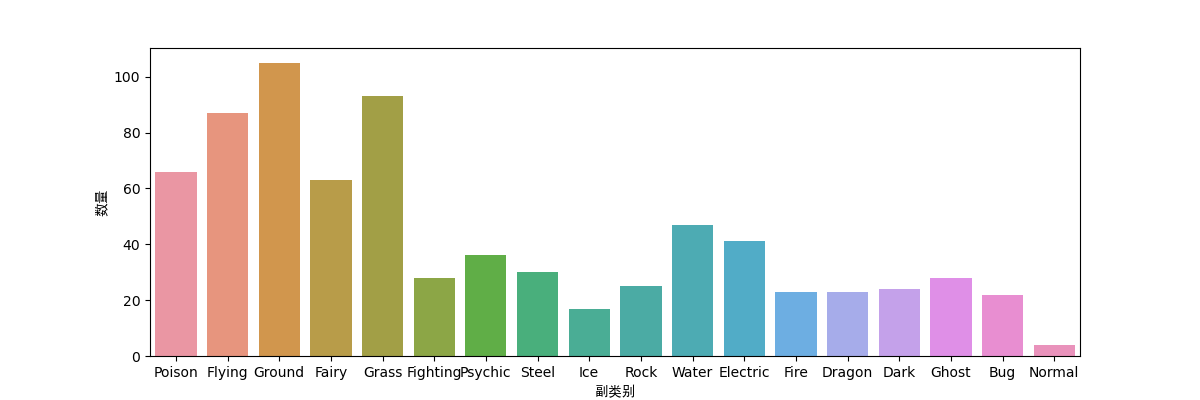

In [11]:
# TODO
# 绘制 Type_1 的数量统计图
# 使用sns.countplot()
# 将title设置为主要类别的数量统计，xlabel设置为主要类别，ylabel设置为数量
# xlabel、y'la'b
plt.figure(figsize=(12,4))
plt.tight_layout()
ax_type1 = sns.countplot(x='Type_1', data=pokemonData)
plt.xlabel('主要类别', fontproperties = myfont)
plt.ylabel('数量', fontproperties = myfont)


### Type_2 的数量统计图

<IPython.core.display.Javascript object>


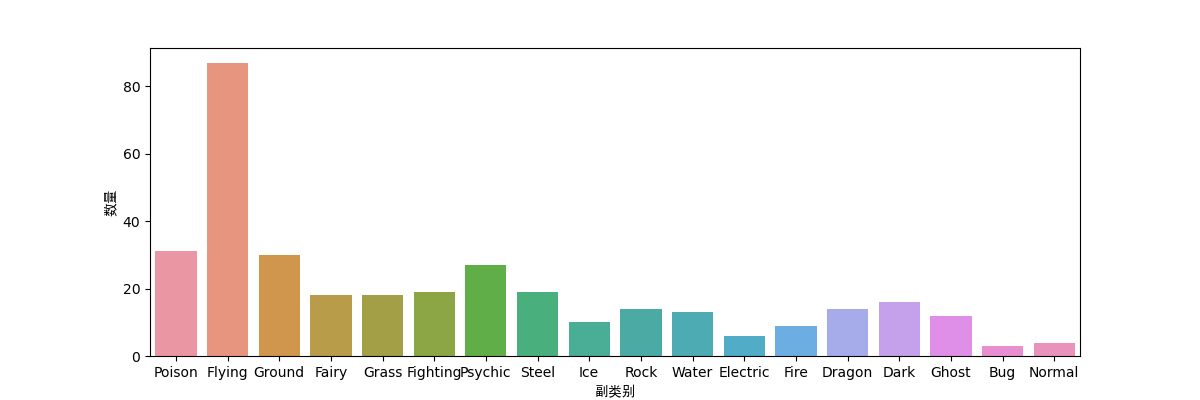

Text(0, 0.5, '数量')

In [13]:
# TODO
# 绘制 Type_2 的数量统计图
# 使用sns.countplot()
# 将title设置为副类别的数量统计，xlabel设置为副类别，ylabel设置为数量
plt.figure(figsize=(12,4))
ax_type2 = sns.countplot(x='Type_2', data=pokemonData)
plt.xlabel('副类别', fontproperties = myfont)
plt.ylabel('数量', fontproperties = myfont)




### Egg_Group_1 的数量统计图

<IPython.core.display.Javascript object>


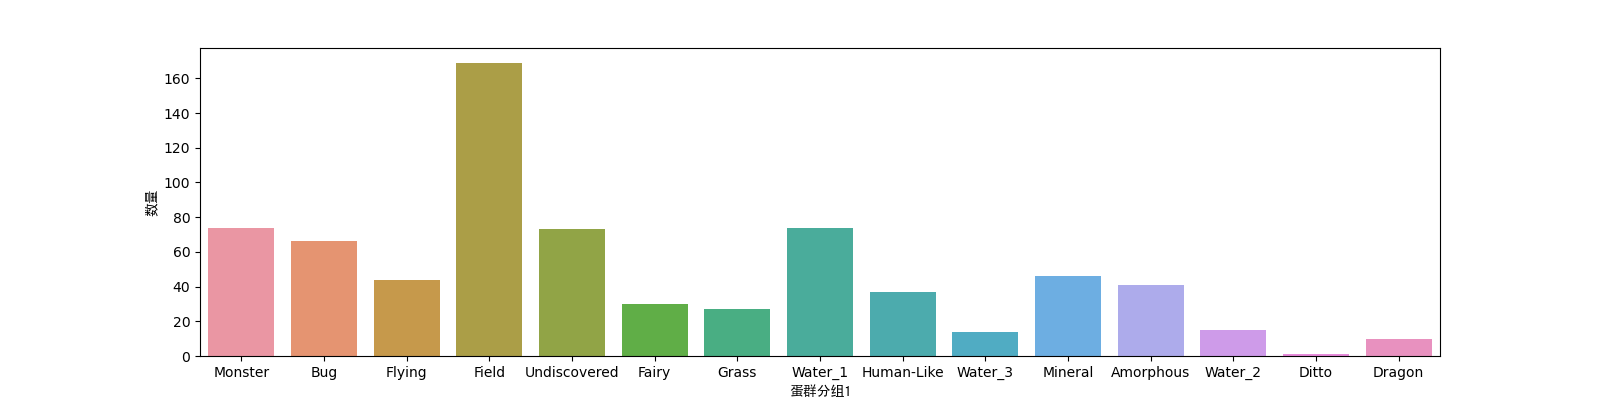

Text(0, 0.5, '数量')

In [15]:
# TODO
# Egg_Group_1 的数量统计图
# 使用sns.countplot()
# 将title设置为蛋群分组1的数量统计，xlabel设置为蛋群分组1，ylabel设置为数量
plt.figure(figsize=(16,4))
ax_type2 = sns.countplot(x='Egg_Group_1', data=pokemonData)
plt.xlabel('蛋群分组1', fontproperties = myfont)
plt.ylabel('数量', fontproperties = myfont)




### Egg_Group_2 的数量统计图

<IPython.core.display.Javascript object>


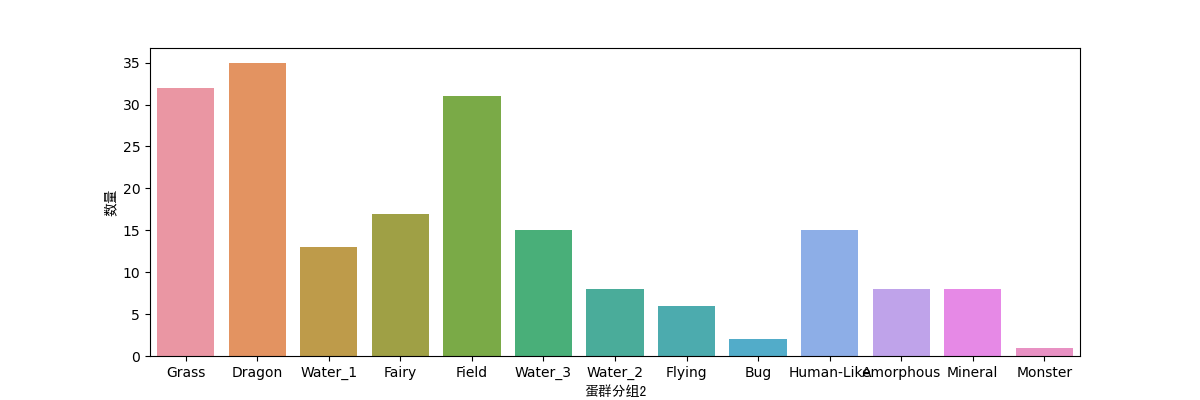

Text(0, 0.5, '数量')

In [17]:
# TODO
# Egg_Group_2 的数量统计图
# 将title设置为蛋群分组2的数量统计，xlabel设置为蛋群分组2，ylabel设置为数量

plt.figure(figsize=(12,4))
ax_type2 = sns.countplot(x='Egg_Group_2', data=pokemonData)
plt.xlabel('蛋群分组2', fontproperties = myfont)
plt.ylabel('数量', fontproperties = myfont)



### 其它单变量数量统计图

In [48]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

# TODO
# isLegendary 的数量统计图
# 将title设置为是否为传说类型的数量统计，xlabel设置为是否为“传说，ylabel设置为数量
ax1 = plt.subplot(2, 3, 1)
sns.countplot(ax=ax1,x='isLegendary', data=pokemonData)
ax1.set_xlabel('蛋群分组2', fontproperties = myfont)
ax1.set_ylabel('数量', fontproperties = myfont)


# TODO
# hasGender 的数量统计图
# 将title设置为是否有性别的数量统计，xlabel设置为是否有性别，ylabel设置为数量
ax2 = plt.subplot(2, 3, 2, sharey=ax1)
sns.countplot(ax=ax2,x='hasGender', data=pokemonData)
ax2.set_xlabel('是否有性别', fontproperties = myfont)
ax2.set_ylabel('数量', fontproperties = myfont)



# TODO
# hasMegaEvolution 的数量统计图
# 将title设置为是否有Mega进化的数量统计，xlabel设置为是否有Mega进化，ylabel设置为数量
ax3 = plt.subplot(2, 3, 3, sharey=ax1)
sns.countplot(ax=ax3,x='hasMegaEvolution', data=pokemonData)
ax3.set_xlabel('否有Mega进化', fontproperties = myfont)
ax3.set_ylabel('数量', fontproperties = myfont)


# TODO
# 颜色color 的数量统计图
# 将title设置为颜色的数量统计，xlabel设置为颜色，ylabel设置为数量
ax4 = plt.subplot(2, 3, 4)
sns.countplot(ax=ax4,x='Color', data=pokemonData)
ax4.set_xlabel('颜色', fontproperties = myfont)
ax4.set_ylabel('数量', fontproperties = myfont)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)

# TODO
# 身形Body_Style 的数量统计图
# 将title设置为身形的数量统计，xlabel设置为身形，ylabel设置为数量
ax5 = plt.subplot(2, 3, 5)
sns.countplot(ax=ax5,x='Body_Style', data=pokemonData)
ax5.set_xlabel('身形', fontproperties = myfont)
ax5.set_ylabel('数量', fontproperties = myfont)
for tick in ax5.get_xticklabels():
    tick.set_rotation(90)


# TODO
# 第n代Generation 的数量统计图
# 将title设置为第n代的数量统计，xlabel设置为第n代，ylabel设置为数量
ax6 = plt.subplot(2, 3, 6)
sns.countplot(ax=ax6,x='Generation', data=pokemonData)
ax6.set_xlabel('第n代', fontproperties = myfont)
ax6.set_ylabel('数量', fontproperties = myfont)



<IPython.core.display.Javascript object>

Text(0, 0.5, '数量')

### 数值型数据分布图

<IPython.core.display.Javascript object>


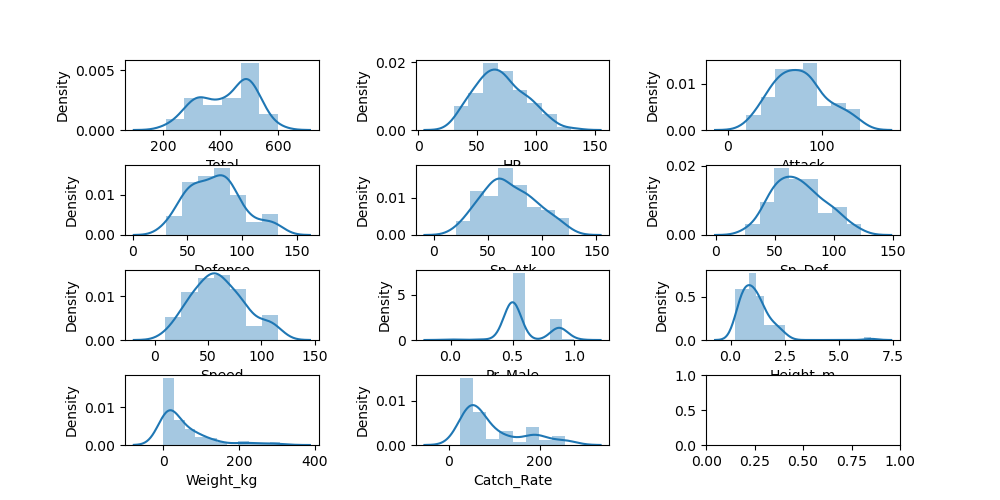

/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

<AxesSubplot:xlabel='Catch_Rate', ylabel='Density'>

In [62]:
# TODO
# 绘制数值型数据概率分布图
# 使用subplot绘制成4行3列
# 数值型数据有：
# 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate'
# 使用dropna()将数据中的缺失值去掉
pokemonData = pokemonData.dropna()

fig, subplot_arr = plt.subplots(4, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

sns.distplot(pokemonData['Total'], hist=True,kde=True, ax=subplot_arr[0][0])
sns.distplot(pokemonData['HP'], hist=True,kde=True, ax=subplot_arr[0][1])
sns.distplot(pokemonData['Attack'], hist=True,kde=True, ax=subplot_arr[0][2])

sns.distplot(pokemonData['Defense'], hist=True,kde=True, ax=subplot_arr[1][0])
sns.distplot(pokemonData['Sp_Atk'], hist=True,kde=True, ax=subplot_arr[1][1])
sns.distplot(pokemonData['Sp_Def'], hist=True,kde=True, ax=subplot_arr[1][2])

sns.distplot(pokemonData['Speed'], hist=True,kde=True, ax=subplot_arr[2][0])
sns.distplot(pokemonData['Pr_Male'], hist=True,kde=True, ax=subplot_arr[2][1])
sns.distplot(pokemonData['Height_m'], hist=True,kde=True, ax=subplot_arr[2][2])

sns.distplot(pokemonData['Weight_kg'], hist=True,kde=True, ax=subplot_arr[3][0])
sns.distplot(pokemonData['Catch_Rate'], hist=True,kde=True, ax=subplot_arr[3][1])



### 变量间相关系数

In [79]:
# TODO
# 计算以上各数值型变量间的相关系数，观察变量间的关系
#plt.figure(figsize=(10, 5))
#sns.pairplot(pokemonData, vars=['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate'], kind='reg', diag_kind='kde')
from scipy import stats

pokemonData['Total'].corr(pokemonData['HP'], method='pearson')
stats.shapiro(pokemonData['HP'])

vars=['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']
vars_exists = []
for x in vars:
    vars_exists.append(x)
    vars_left = [x for x in vars if x not in vars_exists]
    for y in vars_left:
        kendall = pokemonData[x].corr(pokemonData[y], method='kendall')
        if kendall > 0.5:
            print('%s-%s, kendall:%s' %(x,y,kendall))
    


Total-HP, kendall:0.5482401425749356
Total-Attack, kendall:0.5349751957167574
Total-Sp_Atk, kendall:0.530515367686732
Total-Height_m, kendall:0.6281599759949255
Total-Weight_kg, kendall:0.5361674649818148
HP-Height_m, kendall:0.6097746534962247
HP-Weight_kg, kendall:0.5756351501213868
Attack-Height_m, kendall:0.5009471677652227
Attack-Weight_kg, kendall:0.5250934741147398
Height_m-Weight_kg, kendall:0.7565297060035688


In [17]:
# TODO
# 结论
以下列存在相关性
Total-HP, kendall:0.5482401425749356
Total-Attack, kendall:0.5349751957167574
Total-Sp_Atk, kendall:0.530515367686732
Total-Height_m, kendall:0.6281599759949255
Total-Weight_kg, kendall:0.5361674649818148
HP-Height_m, kendall:0.6097746534962247
HP-Weight_kg, kendall:0.5756351501213868
Attack-Height_m, kendall:0.5009471677652227
Attack-Weight_kg, kendall:0.5250934741147398
Height_m-Weight_kg, kendall:0.7565297060035688
